# O PROBLEMA

Imagine que você foi escalado para um time de investimentos e precisará realizar um modelo preditivo com dados do IBOVESPA (Bolsa de Valores) para criar uma série temporal e prever diariamente o fechamento da base.

Para isso, utilize a base de dados contida no site da investing e selecione o período 'diário', com intervalo de tempo que achar adequado.

Você precisará demonstrar para o time de investimentos:

1. O modelo com storytelling, desde a captura do dado até a entrega do modelo;
2. Justificar a técnica utilizada;
3. Atingir uma acurácia adequada (acima de 70%).

Dica: utilize o maior intervalo de tempo possível para atingir maior acurácia no modelo preditivo.

Fonte: https://br.investing.com/indices/bovespa-historical-data

## IBOVESPA

O IBOVESPA é o índice de referência do mercado acionário brasileiro, criado em 1968, que mede o retorno total das carteiras teóricas compostas pelas ações mais negociadas na B3. Seu cálculo é baseado no peso das ações na carteira teórica e no valor de suas cotações do dia.
Para calcular o índice, multiplica-se o peso de cada ação pela sua cotação, resultando no número de pontos do Ibovespa. Devido à constante variação dos preços das ações conforme a oferta e demanda, o cálculo do índice é atualizado minuto a minuto, refletindo suas oscilações.

A Bolsa de Valores brasileira (B3) calcula e divulga o valor do IBOVESPA em tempo real durante o horário de negociação das 9h às 17h. Após o fechamento do mercado, o processo de encerramento ocorre. Às 17h, é liberado o valor preliminar de fechamento, considerando os últimos preços negociados. Entre 17h01 e 17h30, negociações continuam no after market, o que pode impactar esse valor.
O fechamento definitivo ocorre por volta das 18h após o leilão de encerramento, onde ocorrem as últimas negociações do dia. Esse leilão determina os preços de fechamento das ações, permitindo calcular o valor oficial de fechamento.
Posteriormente ao fechamento do mercado, a Bolsa realiza ajustes decorrentes de operações pós-mercado. Por volta das 19h30, é divulgado o valor final de fechamento do índice, que serve como referência para avaliar o desempenho diário do mercado acionário.


## Importando bibliotecas

In [2]:
import warnings 
warnings.filterwarnings(action = 'ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Importando dados

In [4]:
df = pd.read_csv('Dados Históricos - Ibovespa.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4999 non-null   object 
 1   Último    4999 non-null   float64
 2   Abertura  4999 non-null   float64
 3   Máxima    4999 non-null   float64
 4   Mínima    4999 non-null   float64
 5   Vol.      4998 non-null   object 
 6   Var%      4999 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.5+ KB


In [6]:
df.head()

Data   Último  Abertura   Máxima   Mínima    Vol.    Var%
0  11.03.2021  114.984   112.782  115.127  112.776  12,09M   1,96%
1  10.03.2021  112.776   111.331  112.928  109.999  12,51M   1,30%
2  09.03.2021  111.331   110.611  112.525  109.343  12,14M   0,65%
3  08.03.2021  110.612   115.202  115.202  110.268  13,70M  -3,98%
4  05.03.2021  115.202   112.690  115.504  112.504  13,25M   2,23%

## Tratamento de dados

In [7]:
#verificando ocorrência de dados nulos
df.isna().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [8]:
df[df['Vol.'].isnull()]

Data  Último  Abertura  Máxima  Mínima Vol.    Var%
1258  10.02.2016  40.377    40.592  40.592   39.96  NaN  -0,53%

In [9]:
df.drop(1860, inplace = True)
df.isna().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [10]:
#verificando valores duplicados
df.duplicated().sum()

0

In [11]:
#verificando ocorrência de espaçamentos
espacamento_encontrado = False

for column in df.columns:
    for index, value in df[column].items():
        if isinstance(value, str) and value.isspace():
            print(f'Espaçamento encontrado na coluna "{column}", linha {index}.')
            espacamento_encontrado = True

if not espacamento_encontrado:
    print('Não há espaçamento nos dados.')

Não há espaçamento nos dados.


In [12]:
#renomeando colunas
df.rename(columns = {
    'Data': 'data', 
    'Último': 'fechamento', 
    'Abertura': 'abertura', 
    'Máxima': 'maxima', 
    'Mínima': 'minima', 
    'Vol.': 'volume', 
    'Var%': 
    'variacao'}, inplace = True)
    
df.columns

Index(['data', 'fechamento', 'abertura', 'maxima', 'minima', 'volume',
       'variacao'],
      dtype='object')

In [13]:
#alterando tipo da coluna de data
df['data'] = df['data'].str.replace('.', '-')
df['data'] = pd.to_datetime(df['data'], format='%d-%m-%Y')

In [14]:
#alterando tipo da coluna de variação
df['variacao'] = df['variacao'].str.replace(',', '.')
df['variacao'] = df['variacao'].str.replace('%', '').astype(float)

In [15]:
df.head()

data  fechamento  abertura   maxima   minima  volume  variacao
0 2021-03-11     114.984   112.782  115.127  112.776  12,09M      1.96
1 2021-03-10     112.776   111.331  112.928  109.999  12,51M      1.30
2 2021-03-09     111.331   110.611  112.525  109.343  12,14M      0.65
3 2021-03-08     110.612   115.202  115.202  110.268  13,70M     -3.98
4 2021-03-05     115.202   112.690  115.504  112.504  13,25M      2.23

In [16]:
#alterando tipo da coluna de volume
df['volume'] = df['volume'].str.replace(',', '.')
lista = []
for i, j in enumerate(df['volume']):
    if 'M' in str(df['volume'].iloc[i]):
        df['volume'].iloc[i] = df['volume'].iloc[i].replace('M', '')
        lista.append(round(float(df['volume'].iloc[i]) * 1000000))
    elif 'K' in str(df['volume'].iloc[i]):
        df['volume'].iloc[i] = df['volume'].iloc[i].replace('K', '')
        lista.append(round(float(df['volume'].iloc[i]) * 1000))
    else:
        lista.append(df['volume'].iloc[i])

In [17]:
df['volume'].shape

(4998,)

In [18]:
df['volume'] = lista

In [19]:
df.head()

data  fechamento  abertura   maxima   minima      volume  variacao
0 2021-03-11     114.984   112.782  115.127  112.776  12090000.0      1.96
1 2021-03-10     112.776   111.331  112.928  109.999  12510000.0      1.30
2 2021-03-09     111.331   110.611  112.525  109.343  12140000.0      0.65
3 2021-03-08     110.612   115.202  115.202  110.268  13700000.0     -3.98
4 2021-03-05     115.202   112.690  115.504  112.504  13250000.0      2.23

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        4998 non-null   datetime64[ns]
 1   fechamento  4998 non-null   float64       
 2   abertura    4998 non-null   float64       
 3   maxima      4998 non-null   float64       
 4   minima      4998 non-null   float64       
 5   volume      4997 non-null   float64       
 6   variacao    4998 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 312.4 KB


In [21]:
df.set_index('data', inplace = True)
df.sort_index(inplace = True)
df.head()

fechamento  abertura  maxima  minima       volume  variacao
data                                                                   
2000-12-27      15.186    14.805  15.223  14.805  239980000.0      2.65
2000-12-28      15.259    15.188  15.269  15.132  324260000.0      0.48
2001-01-02      15.425    15.242  15.621  15.174  230630000.0      1.09
2001-01-03      16.599    15.425  16.599  15.251  381200000.0      7.61
2001-01-04      16.675    16.597  16.933  16.587  331230000.0      0.46

## EDA

In [22]:
#configurando template do plotly
template = 'ggplot2'

### Estatísticas descritivas

In [23]:
df.describe()

fechamento     abertura       maxima       minima        volume  \
count  4998.000000  4998.000000  4998.000000  4998.000000  4.997000e+03   
mean     52.332949    52.314091    52.867778    51.767679  7.366058e+07   
std      26.170862    26.160394    26.386845    25.936053  1.223740e+08   
min       8.371000     8.397000     8.513000     8.225000  1.121000e+05   
25%      33.508500    33.473250    33.801500    33.153250  2.830000e+06   
50%      53.875500    53.870500    54.386000    53.257500  4.480000e+06   
75%      65.978000    65.959500    66.586500    65.358000  1.204800e+08   
max     125.077000   125.075000   125.324000   123.227000  9.949600e+08   

          variacao  
count  4998.000000  
mean      0.057213  
std       1.798643  
min     -14.780000  
25%      -0.900000  
50%       0.080000  
75%       1.067500  
max      14.660000

In [24]:
fig = px.imshow(
    df.corr(), 
    text_auto = '.2f', 
    template = template
)

fig.update_layout(
    title = {
        'text' : 'Matriz de Correlação',
        'x':0.5,
        'xanchor': 'center'
    },
    width = 800, 
    height = 600,
    margin = dict(l = 60, r = 20, t = 80, b = 60),
)

fig.show()

In [25]:
fig = px.scatter_matrix(
    df,
    dimensions = ['fechamento', 'abertura', 'maxima', 'minima', 'volume', 'variacao'], 
    color = 'fechamento', 
    template = template
)

fig.update_layout(
    title = {
        'text': 'Matriz de Correlação',
        'x':0.5,
        'xanchor': 'center'
    },
    width = 1600, 
    height = 1400,
    margin = dict(l = 100, r = 20, t = 80, b = 80)
)

fig.show()

### Distribuição das variáveis

In [26]:
fig = px.histogram(
    df, 
    x = 'fechamento', 
    nbins = 20,
    template =
     template
)
fig.update_layout(
    title = 'Histograma do Fechamento',
    xaxis_title = 'Fechamento',
    yaxis_title = 'Frequência',
    width = 800, 
    height = 600,
    margin = dict(l = 100, r = 20, t = 80, b = 80)
)

fig.show()

In [27]:
fig = px.histogram(
    df, 
    x = 'abertura', 
    nbins = 20,
    template = template
)

fig.update_layout(
    title = 'Histograma do Abertura',
    xaxis_title = 'Abertura',
    yaxis_title = 'Frequência',
    width = 800, 
    height = 600,
    margin = dict(l = 100, r = 20, t = 80, b = 80),
)

fig.show()

In [28]:
fig = px.box(
    df, 
    x = 'volume',
    template = template
)

fig.update_layout(
    title = 'Boxplot do Volume',
    xaxis_title = 'Valor (R$)',
    yaxis_title = 'Volume',
    width = 800, 
    height = 600,
    margin = dict(l = 80, r = 20, t = 80, b = 80),
    template = template
)

fig.show()

In [29]:
fig = px.histogram(
    df, 
    x = 'variacao', 
    nbins = 20,
    template = template
)

fig.update_layout(
    title = 'Histograma do Variação',
    xaxis_title = 'Variação (%)',
    yaxis_title = 'Frequência',
    width = 800, 
    height = 600,
    margin = dict(l = 100, r = 20, t = 80, b = 80),
    template = template
)

fig.show()

### Decompondo a série

Uma série temporal é dita estacionária se suas propriedades (média, variância, etc.) não dependem do tempo da observação. Portanto, séries que apresentam tendência ou sazonalidade não são estacionárias. Por outro lado, uma série composta por valores gerados aleatoriamente são estacionárias, visto que a “aparência” da série é basicamente a mesma para qualquer período no tempo.

A decomposição da série é importante para entendermos como os dados se comportam a partir dos principais pilares de análise temporal:
 
- Tendencia: direção de uma série temporal ao longo do tempo
- Sazonalidade: recorrência das oscilações na série temporal.
- Resíduos: variação aleatória de uma série temporal, podendo ocorrer por fatores externos imprevisíveis ou por erros de medição.

A partir desse análise, podemos entender a direção do modelo.

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose #lib para decompor série temporal
from statsmodels.tsa.stattools import acf, pacf #autocorrelação e autocorrelação parcial

In [31]:
df_fechamento = df['fechamento'].to_frame()

In [32]:
resultados = seasonal_decompose(df_fechamento, period = 5)

In [33]:
media_movel = resultados.trend.to_frame()
sazonalidade = resultados.seasonal.to_frame()
residuo = resultados.resid.to_frame()

fig = make_subplots(rows = 4, cols = 1)

fig.add_trace(go.Scatter(x = df_fechamento.index, y = df_fechamento.fechamento, name = 'Série'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = media_movel.index, y = media_movel.trend, name = 'Media móvel'), row = 2, col = 1)
fig.add_trace(go.Scatter(x = sazonalidade.index, y = sazonalidade.seasonal, name = 'Sazonalidade'), row = 3, col = 1)

fig.add_trace(go.Scatter(x = residuo.index, y = residuo.resid, name = 'Resíduo'), row = 4, col = 1)

fig.update_layout(
    title = {
        'text' : 'Série Decomposta',
        'x':0.5,
        'xanchor': 'center'
    },
    width = 1600, 
    height = 1200,
    template = template
)

fig.show()

Visualizando médias móveis da série.

In [34]:
ma_semanal = df_fechamento.rolling(5).mean().rename(columns = {'fechamento': 'Média móvel semanal'})
ma_anual = df_fechamento.rolling(52).mean()

fig = px.line(
    ma_semanal,
    template = template
)

fig.add_scatter(
    x = ma_anual.index, 
    y = ma_anual.fechamento, 
    name = 'Média móvel anual'
)

fig.update_layout(
    title = 'Time Series Média Móvel Semanal X Time Series Média Móvel Anual',
    xaxis_title = 'Período',
    yaxis_title = 'Fechamento',
    legend_title = 'Legenda',
    width = 800, 
    height = 600,
    margin = dict(l = 100, r = 20, t = 80, b = 80)
)

fig.show()

### Estacionariedade

Uma característica central no desenvolvimento de modelos de time series com uma abordagem econométrica é uma suposição de alguma forma de equilíbrio estatístico, conhecido como estacionariedade. O conceito de estacionariedade é a principal ideia que se deve ter para estimar uma série temporal. É fundamentalmente a constatação de estacionaridade que permitirá proceder inferências estatísticas sobre os parâmetros estimados com base na realização de um processo estocástico. 

Uma série temporal é dita estacionária se suas propriedades (média, variância, etc.) não dependem do tempo da observação. Portanto, séries que apresentam tendência ou sazonalidade não são estacionárias. Por outro lado, uma série composta por valores gerados aleatoriamente são estacionárias, visto que a “aparência” da série é basicamente a mesma para qualquer período de tempo.

Transformações como logaritmos podem ajudar a estabilizar a variância de uma série temporal. A diferenciação pode ajudar a estabilizar a média de uma série temporal, removendo alterações no nível de uma série temporal e, portanto, eliminando (ou reduzindo) tendências e sazonalidade.

In [35]:
df_log = np.log(df_fechamento).rename(columns = {'fechamento': 'Fechamento'})
ma_log = df_log.rolling(52).mean()

fig = px.line(
    df_log,
    template = template
)

fig.add_scatter(
    x = ma_log.index, 
    y = ma_log.Fechamento, 
    name = 'Média móvel anual'
)

fig.update_layout(
    title = 'Time Series Média Móvel Semanal X Time Series Média Móvel Anual (Logarítmica)',
    xaxis_title = 'Período',
    yaxis_title = 'Fechamento',
    legend_title = 'Legenda',
    width = 800, 
    height = 600,
    margin = dict(l = 100, r = 20, t = 80, b = 80)
)

fig.show()

In [36]:
df_log = np.log(df_fechamento)
ma_log = df_log.rolling(5).mean()

df_s = (df_log - ma_log).dropna()
ma_s = df_s.rolling(5).mean()
std_s = df_s.rolling(5).std()

fig = make_subplots(rows = 1, cols = 3)

fig.add_trace(go.Scatter(x = df_s.index, y = df_s.fechamento, name = 'série logarítmica'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = ma_s.index, y = ma_s.fechamento, name = 'média móvel semanal da série logarítmica'), row = 1, col = 2)
fig.add_trace(go.Scatter(x = std_s.index, y = std_s.fechamento, name = 'desvio padrão semanal da série logarítmica'), row = 1, col = 3)

fig.update_layout(
    title = {
        'text' : 'Time Series Estacionária',
        'x':0.5,
        'xanchor': 'center'
    },
    yaxis_title = 'Fechamento',
    margin = dict(l = 100, r = 20, t = 60, b = 50),
    template = template,
)

fig.show()

In [37]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(5).mean()
std_diff = df_diff.rolling(5).std()

fig = make_subplots(rows = 1, cols = 3)

fig.add_trace(go.Scatter(x = df_diff.index, y = df_diff.fechamento, name = 'série'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = ma_diff.index, y = ma_diff.fechamento, name = 'média móvel da série'), row = 1, col = 2)
fig.add_trace(go.Scatter(x = std_diff.index, y = std_diff.fechamento, name = 'desvio padrão da série'), row = 1, col = 3)

fig.update_layout( 
    title = {
        'text' : 'Time Series Estacionária',
        'x':0.5,
        'xanchor': 'center'
    },
    yaxis_title = 'Fechamento',
    margin = dict(l = 100, r = 20, t = 60, b = 50),
    template = template,
)

fig.show()

### Teste estatístico de estacionariedade para a variável target

Ao analisar os dados de uma time series é preciso garantir que estes são estacionários, ou seja, que a time series possui um comportamento ao longo do tempo e que possui uma alta probabilidade de seguir este mesmo comportamento no futuro. Em econometria, o teste de estacionariedade, também conhecido como Augmented Dickey-Fuller (ADF) é uma técnica para testar a hipóteseda estacionariedade da time series.

>H0 - Hipótese Nula (não é estacionária)

>H1 - Hipótese Alternativa (rejeita a hipótese nula)

**p-valor <= 0.05 rejeitamos H0 com um nível de confiança de 95%**

In [38]:
from statsmodels.tsa.stattools import adfuller


X = df_diff.dropna()

result = adfuller(X)

print('Teste ADF')
print(f'Teste estatístico: {result[0]}')
print(f'P-valor: {result[1]}')
print(f'Valores críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -20.02604356506368
P-valor: 0.0
Valores críticos:
	1%: -3.431669090222372
	5%: -2.8621228942049535
	10%: -2.567080275469888


In [39]:
lag_acf = acf(df_diff.dropna(), nlags = 21) #trabalhando na base mensal
lag_pacf = pacf(df_diff.dropna(), nlags = 21)

### ACF e PACF

5% ACF

1.96 / sqrt(N - d) -> N (número de pontos da base), d (número de vezes que diferenciamos a base)

In [40]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('ACF', 'PACF'))

fig.add_trace(go.Scatter(y = lag_acf), row = 1, col = 1)
fig.add_trace(go.Scatter(y = lag_pacf), row = 1, col = 2)

fig.add_hline(y = -1.96 / (np.sqrt(len(df_diff) - 1)), line_width = 0.7, line_dash = 'dash', line_color = 'black')
fig.add_hline(y = 0, line_width = 0.7, line_dash = 'dash', line_color = 'black')
fig.add_hline(y = 1.96/ (np.sqrt(len(df_diff) - 1)), line_width = 0.7, line_dash = 'dash', line_color = 'black')

fig.update_layout(
    xaxis_title = '',
    yaxis_title = '',
    showlegend = False,
    width = 1600, 
    height = 600,
    template = template
)

fig.show()

## Modelando

### Função de validação

Erro absoluto percentual médio (MAPE) é uma métrica para avaliar modelos de regressão em machine learning. Um valor de MAPE baixo significa que as previsões estão próximas dos valores observados (seu modelo está acertando bem), enquanto um valor alto indica que as previsões estão longe dos valores observados (o modelo precisa ser melhorado).

$$\text{MAPE}(y, \hat{y}) = \frac{1}{N} \sum_{i=0}^{n - 1} \text{|} \frac{y_i - \hat{y}_i}{y_i} \text{|}$$

O WAPE (Weighted Absolute Percentage Error) é uma variação do MAPE que faz as somas dos erros percentuais e dos valores observados antes da divisão. O WAPE é outra maneira de escapar do problema de valores zero nos dados observados. Ele é outra alternativa recomendada quando a maioria de seus produtos não vendem em todos os períodos ou são vendidos em pouca quantidade. Quando um produto tem baixo volume de vendas, qualquer erro na previsão tem um impacto significativo na porcentagem de erro calculada pelo MAPE. Mesmo que o erro absoluto seja pequeno, ele será dividido por um valor muito baixo, resultando em uma porcentagem de erro elevada. Isso pode dar a impressão que a previsão é muito pior do que realmente é. Já no caso do WAPE, como a divisão é feita pela soma de todos os valores reais absolutos de uma vez, esse efeito é menor.

$$\text{WAPE}(y, \hat{y}) = \frac{\sum_{i=1}^{n} \text{|} \hat{y}_i - {y_i} \text{|}}{\sum_{i=1}^{n} \text{|} {y}_i \text{|}}

In [41]:
def mape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

### Statsforecast

É um pacote de modelos probabilísticos (nos dá um intervalo de valores para o que estamos tentando prever) e de ponto (estamos cravando o resultado, dando apenas o valor mais provável).
Modelo estatístico de série univariadas, ou seja, utilizamos apenas a nossa serie target (dependente) para fazer previsões.
Não fica limitado a prever uma série de cada vez, pois ela é escalável para prever múltiplas series ao mesmo tempo.


#### Tratando DataFrame para a biblioteca StatsForecast

In [42]:
df_diff.reset_index(inplace = True)
df_diff = df_diff[['data', 'fechamento']].rename(columns = {'data': 'ds', 'fechamento': 'y'})
df_diff['unique_id'] = 'Fechamento'
df_diff.dropna(inplace = True)
df_diff.head()

ds         y   unique_id
1 2001-01-05 -0.031523  Fechamento
2 2001-01-08 -0.007168  Fechamento
3 2001-01-09  0.005527  Fechamento
4 2001-01-10 -0.007182  Fechamento
5 2001-01-11  0.002044  Fechamento

In [43]:
df_diff.shape

(4993, 3)

In [44]:
df.reset_index(inplace = True)
df = df[['data', 'fechamento']].rename(columns = {'data': 'ds', 'fechamento': 'y'})
df['unique_id'] = 'Fechamento'
df.dropna(inplace = True)
df.head()

ds       y   unique_id
0 2000-12-27  15.186  Fechamento
1 2000-12-28  15.259  Fechamento
2 2001-01-02  15.425  Fechamento
3 2001-01-03  16.599  Fechamento
4 2001-01-04  16.675  Fechamento

In [45]:
df.shape

(4998, 3)

In [46]:
df.tail()

ds        y   unique_id
4993 2021-03-05  115.202  Fechamento
4994 2021-03-08  110.612  Fechamento
4995 2021-03-09  111.331  Fechamento
4996 2021-03-10  112.776  Fechamento
4997 2021-03-11  114.984  Fechamento

#### Separando base de treino e de teste

In [47]:
treino = df.loc[df['ds'] < '2021-03-05'] #dados de treino
valid = df.loc[(df['ds'] >= '2021-03-05') & (df['ds'] <= '2021-03-11')] #dados de validação (5 dias), quanto maior o período de predição, maior a largura de banda (maior o erro)
h = valid['ds'].nunique() #datas distintas no intervalo (5 dias)
h

5

In [48]:
treino_diff = df_diff.loc[df_diff['ds'] < '2021-03-05'] 
valid_diff = df_diff.loc[(df_diff['ds'] >= '2021-03-05') & (df_diff['ds'] <= '2021-03-11')] 
h_diff = valid_diff['ds'].nunique() 
h_diff

5

In [49]:
#seguimentando base para testes
t1 = df.loc[(df['ds'] >= '2013-01-01') & (df['ds'] < '2015-01-01')] 
t2 = df.loc[(df['ds'] >= '2015-01-01') & (df['ds'] < '2017-01-01')]
t3 = df.loc[(df['ds'] >= '2017-01-01') & (df['ds'] < '2019-01-01')]
t4 = df.loc[(df['ds'] >= '2019-01-01') & (df['ds'] < '2021-01-01')]
t5 = df.loc[(df['ds'] >= '2021-01-01') & (df['ds'] < '2023-01-01')]

valid_1 = df.loc[(df['ds'] >= '2015-01-01') & (df['ds'] < '2020-01-01')]
valid_2 = df.loc[(df['ds'] >= '2017-01-01') & (df['ds'] < '2017-02-01')]
valid_3 = df.loc[(df['ds'] >= '2019-01-01') & (df['ds'] < '2019-02-01')]
valid_4 = df.loc[(df['ds'] >= '2021-01-01') & (df['ds'] < '2021-02-01')]
valid_5 = df.loc[(df['ds'] >= '2023-01-01') & (df['ds'] < '2023-02-01')]

h_1 = valid_1['ds'].nunique() 
h_2 = valid_2['ds'].nunique() 
h_3 = valid_3['ds'].nunique() 
h_4 = valid_4['ds'].nunique() 
h_5 = valid_5['ds'].nunique() 

In [50]:
valid_diff.shape, treino_diff.shape

((5, 3), (4988, 3))

In [51]:
valid.shape, treino.shape

((5, 3), (4993, 3))

### SeasonalNaive (Modelo baseline)

Um método semelhante é útil para dados altamente sazonais. Neste caso, definimos cada previsão como igual ao último valor observado da mesma estação (por exemplo, o mesmo mês do ano anterior). Formalmente, a previsão de tempo T+h está escrito como

$$\hat{y}_{T+h|T} = y_{T+h-m(k+1)},$$

onde m = o período sazonal, e k é a parte inteira de (h - 1)/m (ou seja, o número de anos completos no período de previsão antes do tempo T+h). 

Por exemplo, com dados mensais, a previsão para todos os valores futuros de Fevereiro é igual ao último valor de Fevereiro observado. Com dados trimestrais, a previsão de todos os valores futuros do Q2 é igual ao último valor observado do Q2 (onde Q2 significa o segundo trimestre). Regras semelhantes se aplicam a outros meses e trimestres e a outros períodos sazonais.


In [52]:
from statsforecast import StatsForecast
from statsforecast.models import Naive

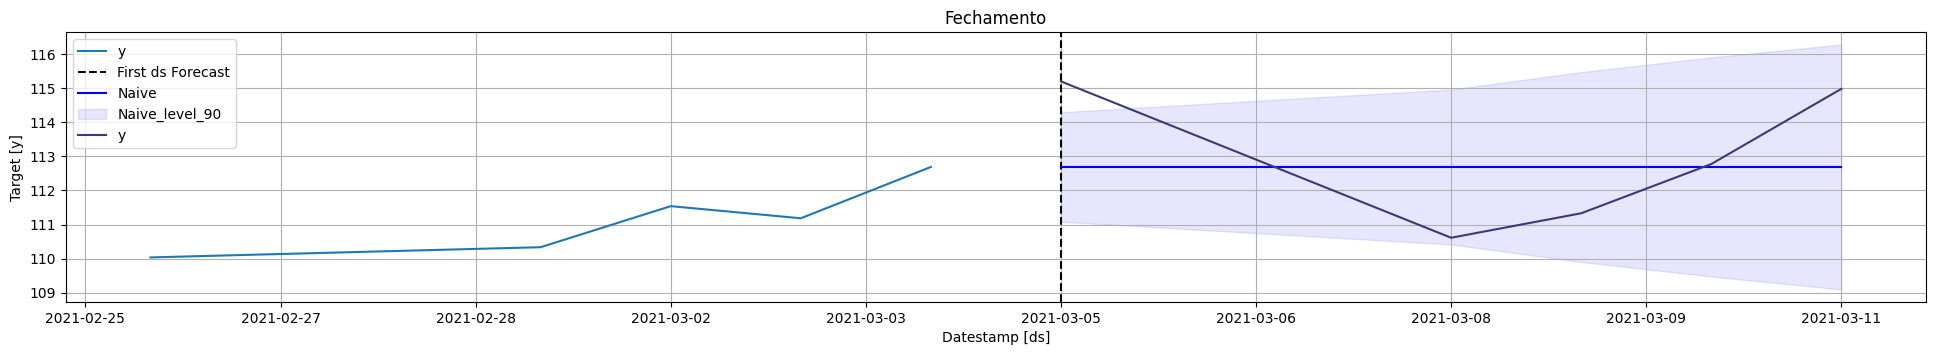

In [53]:
model = StatsForecast(models = [Naive()], freq = 'D', n_jobs = -1) #n_jobs, quantidade de CPUs da máquina que será ultilizada
model.fit(treino)
forecast_df = model.predict(h = h, level = [90]) #level é a banda de confiança estabelecida
forecast_df.ds = valid.ds.to_list()
forecast_df = forecast_df.reset_index().merge(valid, on = ['ds', 'unique_id'], how = 'left')
model.plot(treino, forecast_df, level = [90], engine = 'matplotlib', max_insample_length = h)

In [54]:
wmape_baseline = mape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f'WMAPE: {wmape_baseline:.2%}')

WMAPE: 1.47%


In [55]:
forecast_df.head()

unique_id         ds       Naive  Naive-lo-90  Naive-hi-90        y
0  Fechamento 2021-03-05  112.690002   111.081726   114.298279  115.202
1  Fechamento 2021-03-08  112.690002   110.415558   114.964447  110.612
2  Fechamento 2021-03-09  112.690002   109.904388   115.475616  111.331
3  Fechamento 2021-03-10  112.690002   109.473450   115.906555  112.776
4  Fechamento 2021-03-11  112.690002   109.093788   116.286217  114.984

### SeasonalNaive (Modelo baseline com sazonalidade)

Em um modelo de regressão múltipla, prevemos a variável de interesse usando uma combinação linear de preditores. Em um modelo de autorregressão, prevemos a variável de interesse usando uma combinação linear de valores passados ​​da variável. O termo autorregressão indica que é uma regressão da variável contra si mesma.

Assim, um modelo autorregressivo de ordem p pode ser escrito como

$$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t},$$

onde εt é o ruído branco. 

É como uma regressão múltipla, mas com valores defasados ​​de t como preditores. Nos referimos a isso como um  modelo AR(p), um modelo autorregressivo de ordem p.

Os modelos autorregressivos são notavelmente flexíveis para lidar com uma ampla gama de diferentes padrões de séries temporais.

In [56]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive

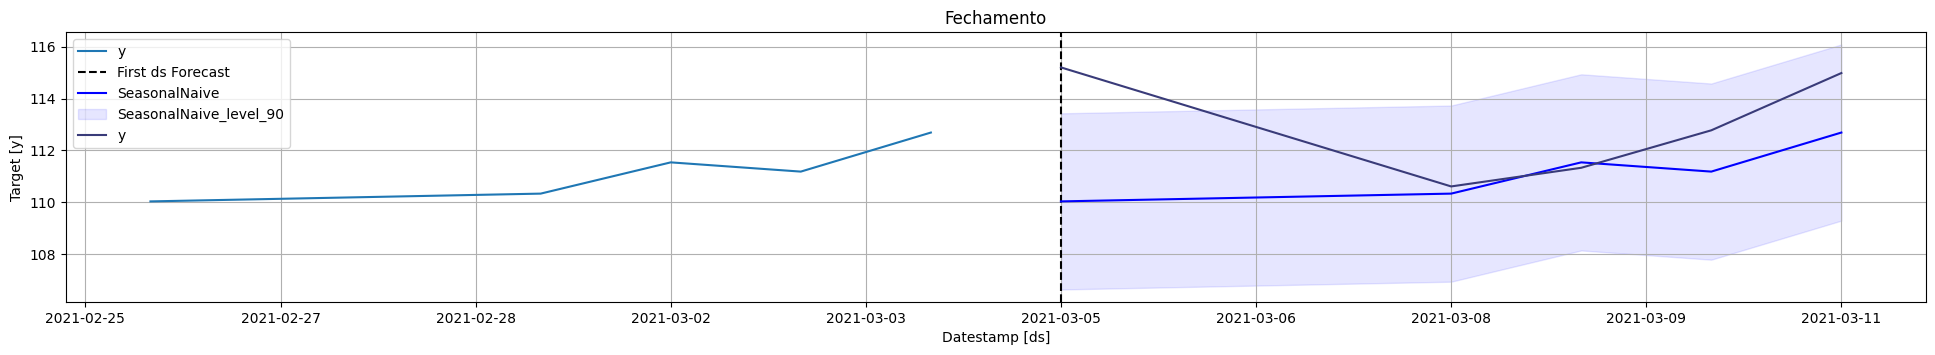

In [57]:
model_s = StatsForecast(models = [SeasonalNaive(season_length = 5)], freq = 'D', n_jobs = -1) #o parâmetro season_length é o padrão que se deseja estabelecer
model_s.fit(treino)
forecast_dfs = model_s.predict(h = h, level = [90])
forecast_dfs.ds = valid.ds.to_list()
forecast_dfs = forecast_dfs.reset_index().merge(valid, on = ['ds', 'unique_id'], how = 'left')
model_s.plot(treino, forecast_dfs, level = [90], engine = 'matplotlib', max_insample_length = h)

In [58]:
wmape_s = mape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f'WMAPE: {wmape_s:.2%}')

WMAPE: 1.69%


In [59]:
forecast_dfs.head()

unique_id         ds  SeasonalNaive  SeasonalNaive-lo-90  \
0  Fechamento 2021-03-05     110.035004           106.638756   
1  Fechamento 2021-03-08     110.334999           106.938751   
2  Fechamento 2021-03-09     111.540001           108.143753   
3  Fechamento 2021-03-10     111.183998           107.787750   
4  Fechamento 2021-03-11     112.690002           109.293755   

   SeasonalNaive-hi-90        y  
0           113.431252  115.202  
1           113.731247  110.612  
2           114.936249  111.331  
3           114.580246  112.776  
4           116.086250  114.984

### SeasonalWindowAverage (Modelo baseline com sazonalidade e média móvel)

Em vez de utilizar valores passados ​​da variável de previsão numa regressão, um modelo de média móvel utiliza erros de previsão passados ​​num modelo semelhante a uma regressão.

$$y_{t} = c + \varepsilon_t + \theta_{1}\varepsilon_{t-1} + \theta_{2}\varepsilon_{t-2} + \dots + \theta_{q}\varepsilon_{t-q},$$

onde εt é o ruído branco.
 
Nos referimos a isso como um modelo MA(q), um modelo de média móvel de ordem q. É claro que não observamos os valores de εt, portanto não é realmente uma regressão no sentido usual. 

Observe que cada valor de t pode ser pensado como uma média móvel ponderada dos últimos erros de previsão. No entanto, os modelos de média móvel não devem ser confundidos com a suavização da média móvel. Um modelo de média móvel é usado para prever valores futuros, enquanto a suavização da média móvel é usada para estimar o ciclo de tendência de valores passados.

In [60]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage

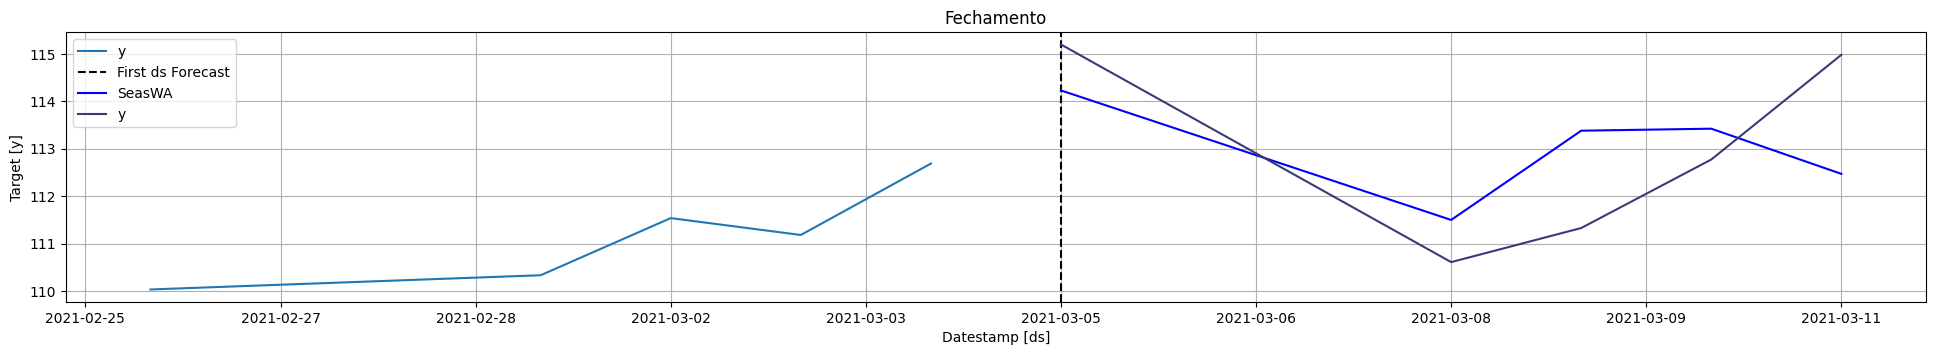

In [61]:
model_sm = StatsForecast(models = [SeasonalWindowAverage(season_length = 5, window_size = 4)], freq = 'D', n_jobs = -1) #o parâmetro window_size é período em que será calculada a média móvel (2 semanas)
model_sm.fit(treino)
forecast_dfsm = model_sm.predict(h = h, level = [90])
forecast_dfsm.ds = valid.ds.to_list()
forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on = ['ds', 'unique_id'], how = 'left')
model_sm.plot(treino, forecast_dfsm, level = [90], engine = 'matplotlib', max_insample_length = h)

In [62]:
wmape_sm = mape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values)
print(f'WMAPE: {wmape_sm:.2%}')

WMAPE: 1.25%


In [63]:
forecast_dfsm.head()

unique_id         ds      SeasWA        y
0  Fechamento 2021-03-05  114.233002  115.202
1  Fechamento 2021-03-08  111.501495  110.612
2  Fechamento 2021-03-09  113.383499  111.331
3  Fechamento 2021-03-10  113.425995  112.776
4  Fechamento 2021-03-11  112.473000  114.984

### Modelo ARIMA

Se combinarmos a diferenciação com a autorregressão e um modelo de média móvel, obtemos um modelo ARIMA não sazonal. ARIMA é um acrônimo para Média Móvel Integrada AutoRegressiva (neste contexto, “integração” é o inverso de diferenciação). O modelo completo pode ser escrito como

\begin{equation}
  y'_{t} = c + \phi_{1}y'_{t-1} + \cdots + \phi_{p}y'_{t-p}
     + \theta_{1}\varepsilon_{t-1} + \cdots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t},  \tag{8.1}
\end{equation}

onde y't é a série diferenciada (pode ter sido diferenciada mais de uma vez).

Os “preditores” no lado direito incluem ambos os valores defasados ​​de y_t e erros atrasados. Chamamos isso de modelo ARIMA(p, d, q) modelo, onde:

- p = ordem da parte autoregressiva;

- d = grau de primeira diferenciação envolvido;

- q = ordem da parte da média móvel.

As mesmas condições de estacionariedade e invertibilidade usadas para modelos autoregressivos e de média móvel também se aplicam a um modelo ARIMA.



In [64]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

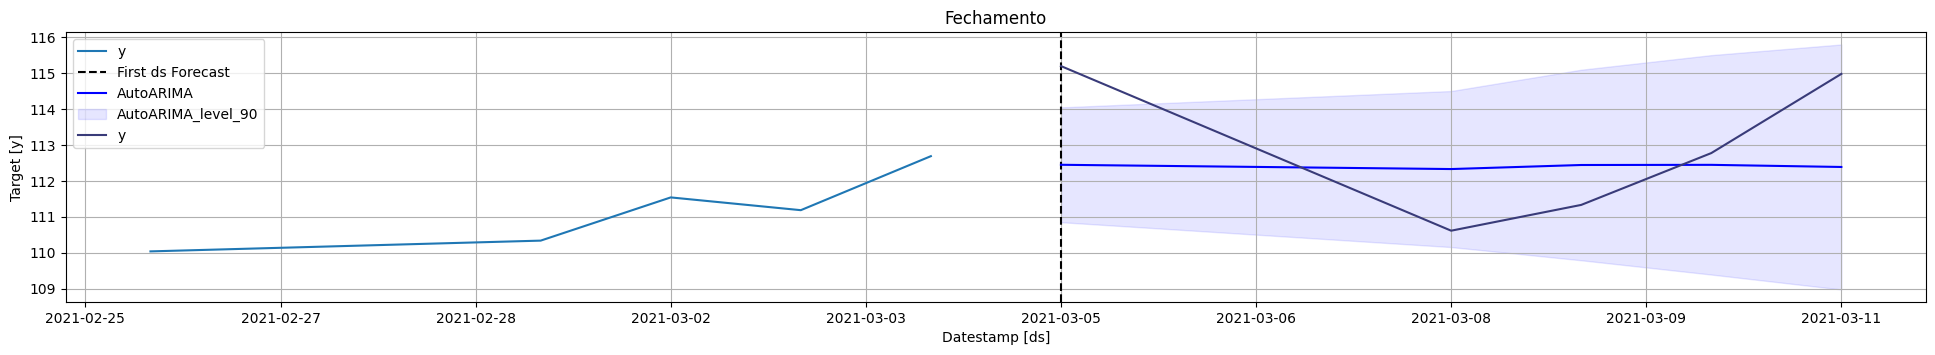

In [65]:
model_a = StatsForecast(models = [AutoARIMA(season_length = 5)], freq = 'B', n_jobs = -1)
model_a.fit(treino)
forecast_dfa = model_a.predict(h = h, level = [90])
forecast_dfa.ds = valid.ds.to_list()
forecast_dfa = forecast_dfa.reset_index().merge(valid, on = ['ds', 'unique_id'], how = 'left')
model_a.plot(treino, forecast_dfa, level = [90], engine = 'matplotlib', max_insample_length = h)

In [66]:
wmape_a = mape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f'WMAPE: {wmape_a:.2%}')

WMAPE: 1.51%


In [67]:
forecast_dfa.head()

unique_id         ds   AutoARIMA  AutoARIMA-lo-90  AutoARIMA-hi-90  \
0  Fechamento 2021-03-05  112.449692       110.848900       114.050484   
1  Fechamento 2021-03-08  112.330566       110.155327       114.505798   
2  Fechamento 2021-03-09  112.443626       109.787292       115.099953   
3  Fechamento 2021-03-10  112.447998       109.388947       115.507050   
4  Fechamento 2021-03-11  112.388611       108.973145       115.804085   

         y  
0  115.202  
1  110.612  
2  111.331  
3  112.776  
4  114.984

### AutoARIMA

O modelo AutoARIMA é uma versão automatizada do modelo ARIMA para séries temporais. No modelo ARIMA tradicional, é necessário especificar manualmente os valores dos parâmetros p, d e q, que representam, respectivamente, a ordem do modelo autorregressivo, o grau de diferenciação e a ordem do modelo de média móvel.

Já o AutoARIMA determina automaticamente os valores ideais desses parâmetros para o conjunto de dados fornecido, simplificando o processo de construção e removendo a necessidade de tentativa e erro na especificação dos parâmetros.
Isso permite que o AutoARIMA forneça modelos ARIMA otimizados para cada conjunto de dados, melhorando o desempenho e a precisão das previsões.


In [68]:
from pmdarima.arima import auto_arima

In [69]:
stepwise_model = auto_arima(df.drop('unique_id', axis = 1).set_index('ds', drop = True), start_p = 1, start_q = 1,
                           max_p = 3, max_q = 3, m = 7,
                           start_P = 0, seasonal = True,
                           d = 1, D = 1, trace = True,
                           error_action = 'ignore',  
                           suppress_warnings = True, 
                           stepwise = True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=3.33 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=17010.815, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=15708.122, Time=0.70 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=2.39 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=16994.280, Time=0.18 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=15197.872, Time=1.26 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=7.43 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=3.74 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=15225.095, Time=0.82 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=15195.205, Time=1.64 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=15709.074, Time=1.09 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=7.49 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=4.15 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=15195.952, Time=1.92 sec
 ARIMA(2,1,1)(2,1,0)[7]             : AIC=15196.762, Ti

In [70]:
treino_autoarima = treino.drop('unique_id', axis = 1).set_index('ds', drop = True)
stepwise_model.fit(treino_autoarima)

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [71]:
future_forecast = stepwise_model.predict(n_periods = h)

C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [72]:
valid.head()

ds        y   unique_id
4993 2021-03-05  115.202  Fechamento
4994 2021-03-08  110.612  Fechamento
4995 2021-03-09  111.331  Fechamento
4996 2021-03-10  112.776  Fechamento
4997 2021-03-11  114.984  Fechamento

In [73]:
valid_autoarima = valid
valid_autoarima.drop('unique_id', axis = 1, inplace = True)
valid_autoarima.set_index('ds', inplace = True)

In [74]:
valid_autoarima.shape, future_forecast.shape

((5, 1), (5,))

In [75]:
wmape_a = mape(valid_autoarima.values, future_forecast.values)
print(f'WMAPE: {wmape_a:.2%}')

WMAPE: 7.81%


In [76]:
future_forecast = pd.DataFrame(future_forecast.values, index = valid_autoarima.index, columns = ['Prediction'])
valid_autoarima = valid_autoarima.rename(columns = {'y': 'Fechamento'})


In [77]:
fig = px.line(
    valid_autoarima,
    template = template
)

fig.add_scatter(
    x = future_forecast.index, 
    y = future_forecast.Prediction, 
    text = 'Prediction',
    name = 'Fechamento previsto')

fig.update_layout(
    title = 'Fechamento X Fechamento Previsto',
    xaxis_title = 'Período',
    yaxis_title = 'Fechamento',
    legend_title = 'Legenda',
    width = 800, 
    height = 600,
    margin = dict(l = 100, r = 20, t = 80, b = 100)
)

fig.show()

### SARIMA

O modelo SARIMA (Seasonal Autoregressive Integrated Moving Average) é um modelo estatístico usado em séries temporais que exibem sazonalidade e não-estacionariedade. Ele é uma extensão do modelo ARIMA e amplamente utilizado em previsão de séries temporais em economia e finanças. Ele capta de forma flexível as principais características de séries temporais reais.
As principais características do modelo SARIMA são:

•	Sazonalidade;

•	Autorregressão;

•	Médias móveis;

•	Diferenciação;

•	Ordem.


In [78]:
import statsmodels.api as sm

In [79]:
valid

y
ds                 
2021-03-05  115.202
2021-03-08  110.612
2021-03-09  111.331
2021-03-10  112.776
2021-03-11  114.984

In [80]:
treino_sarima = treino.set_index('ds').drop('unique_id', axis = 1)
valid_sarima = valid
h

5

In [100]:
treino_sarima.tail()

y
ds                 
2021-02-26  110.035
2021-03-01  110.335
2021-03-02  111.540
2021-03-03  111.184
2021-03-04  112.690

In [82]:
valid_sarima

y
ds                 
2021-03-05  115.202
2021-03-08  110.612
2021-03-09  111.331
2021-03-10  112.776
2021-03-11  114.984

Hiperpâmetros otimizados: (2,1,0)(2,1,0)[7]

In [101]:
model_s = sm.tsa.statespace.SARIMAX(treino_sarima, order = (2, 1, 0), seasonal_order = (2, 1, 0, 7))
model_s = model_s.fit()

C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [102]:
len(treino_sarima)

4993

In [103]:
treino_sarima.tail()

y
ds                 
2021-02-26  110.035
2021-03-01  110.335
2021-03-02  111.540
2021-03-03  111.184
2021-03-04  112.690

In [104]:
forecast_sarima = model_s.predict(start = 4994, end = 4998, dynamic = True)
forecast_sarima
#valid_sarima[['y','forecast']].plot(figsize = (12, 8))

C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\jorge\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



4994    112.686207
4995    112.013718
4996    112.070675
4997    112.101764
4998    110.088482
Name: predicted_mean, dtype: float64

In [105]:
valid_sarima

Fechamento
ds                    
2021-03-05     115.202
2021-03-08     110.612
2021-03-09     111.331
2021-03-10     112.776
2021-03-11     114.984

In [106]:
wmape_a = mape(valid_sarima.values, forecast_sarima.values)
print(f'WMAPE: {wmape_a:.2%}')

WMAPE: 8.79%


In [89]:
valid_sarima = valid_sarima.rename(columns = {'y': 'Fechamento'})
forecast_sarima = forecast_sarima.to_frame().rename(columns = {'predicted_mean': 'Fechamento'}).set_index(valid_sarima.index)

In [90]:
fig = px.line(
    valid_sarima, 
    template = template
)

fig.add_scatter(
    x = forecast_sarima.index, 
    y = forecast_sarima.Fechamento, 
    name = 'Fechamento previsto'
)

fig.update_layout(
    title = 'Fechamento X Fechamento Previsto',
    xaxis_title = 'Período',
    yaxis_title = 'Fechamento',
    legend_title = 'Legenda',
    width = 800, height = 600,
    margin = dict(l = 100, r = 20, t = 80, b = 100)
)

fig.show()

### Prophet

O Prophet é um modelo produzido pelo Facebook com o objetivo de prever valores futuros com base em dados históricos. Ele funciona identificando padrões nos dados, como tendências que aumentam ou diminuem ao longo do tempo e combinando tendências, sazonalidades e efeitos em uma equação matemática.

$$y_t = g(t) + s(t) + h(t) + \varepsilon_t,$$ 

onde:

- g(t) = tendência linear ao longo do tempo;

- s(t) = padrões sazonais;

- h(t) = efeitos de feriados;

- ε = Termo de erro em forma de ruído.


In [91]:
from prophet import Prophet

In [92]:
treino_prophet = treino.reset_index(drop = True).drop('unique_id', axis = 1)
valid_prophet = valid
h

5

In [93]:
treino_prophet.head()

ds       y
0 2000-12-27  15.186
1 2000-12-28  15.259
2 2001-01-02  15.425
3 2001-01-03  16.599
4 2001-01-04  16.675

In [94]:
model_p = Prophet()
model_p.fit(treino_prophet)

16:52:49 - cmdstanpy - INFO - Chain [1] start processing
16:52:51 - cmdstanpy - INFO - Chain [1] done processing


In [95]:
future = model_p.make_future_dataframe(periods = h, include_history = False)

In [96]:
forecast_prophet = model_p.predict(future)
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2021-03-05  113.617327  107.002419  120.532514
1 2021-03-06  113.464716  106.126084  120.450909
2 2021-03-07  113.370964  106.326387  119.861844
3 2021-03-08  113.298639  106.906309  120.147695
4 2021-03-09  113.218737  106.774790  119.955276

In [97]:
forecast_prophet = forecast_prophet[['ds', 'yhat']].set_index('ds')
forecast_prophet.index = valid_prophet.index
forecast_prophet.head()

yhat
ds                    
2021-03-05  113.617327
2021-03-08  113.464716
2021-03-09  113.370964
2021-03-10  113.298639
2021-03-11  113.218737

In [98]:
wmape_a = mape(valid_prophet['y'].values, forecast_prophet['yhat'].values)
print(f'WMAPE: {wmape_a:.2%}')

WMAPE: 1.55%


In [99]:
valid_prophet = valid_prophet.rename(columns = {'y': 'Fechamento'})

fig = px.line(
    valid_prophet, 
    template = template
)

fig.add_scatter(
    x = forecast_prophet.index, 
    y = forecast_prophet.yhat, 
    name = 'Fechamento previsto'
)

fig.update_layout(
    title = 'Fechamento X Fechamento Previsto',
    xaxis_title = 'Período',
    yaxis_title = 'Fechamento',
    legend_title = 'Legenda',
    width = 800, height = 600,
    margin = dict(l = 100, r = 20, t = 80, b = 100)
)

fig.show()